# Feature Selection Plot 

Let's implement here the code to obtain the Feature Selection plots as they were obtained in compare_feture_selection.py. 

The aim is to obtain a plot in which we see how the Average Precision of the different models (ExIFFI,DIFFI,Random Forest,Casual) changes as we reduce the number of features. Every time we remove the feature with the lowest importance score. 

In [1]:
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
sys.path.append('../')
from utils import *
from compare_features import *
from plot import *
from simulation_setup import *
from models import *
from models.Extended_IF import *
from models.Extended_DIFFI import *
from models.Extended_DIFFI_original import *
from feature_selection import *
import seaborn as sns
sns.set()

import os
import pickle 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# AUTOMATIC CREATION OF IMPORTANCES FILES

In [10]:
def csv_dataset(name, path = "../data/"):
    datapath = path + name + ".csv"
    data=pd.read_csv(datapath,index_col=0)
    if 'Unnamed: 0' in data.columns:
        data=data.drop(columns=['Unnamed: 0'])
    
    X=data[data.columns[data.columns!='Target']]
    y=data['Target']
    
    X,y = drop_duplicates(X,y)
    print(name, "\n")
    print_dataset_resume(X,y)
    
    return X,y

In [11]:
def importance_files(name):
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
    if name=='diabetes' or name=='moodify':
        X,y=csv_dataset(name,os.getcwd()+'\\')
    else:
        X,y=dataset(name,os.getcwd()+'\\')
    
    X,y=downsample(X,y)
    X_train,X_test=partition_data(X,y)
    X=np.r_[X_train,X_test]
    y_train=np.zeros(X_train.shape[0])
    y_test=np.ones(X_test.shape[0])
    y=np.concatenate([y_train,y_test])
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    imp,score=create_Importances_dict(300,10,256,X,X,y,name)
    make_importances_file(imp,name)

Example

In [12]:
importance_files('diabetes')

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


100%|██████████| 10/10 [38:10<00:00, 229.10s/it]


In [2]:
def partition_data(X,y):
    inliers=X[y==0,:]
    outliers=X[y==1,:]
    return inliers,outliers

# AUTOMATIC PLOT FEATSEL FUNCTION

In [4]:
def obtain_featsel(name):
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
    if name=='diabetes' or name=='moodify':
        X,y=csv_dataset(name,os.getcwd()+'\\')
    else:
        X,y=dataset(name,os.getcwd()+'\\')
        
    X,y=downsample(X,y)
    X_train,X_test=partition_data(X,y)
    X=np.r_[X_train,X_test]
    y_train=np.zeros(X_train.shape[0])
    y_test=np.ones(X_test.shape[0])
    y=np.concatenate([y_train,y_test])
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    # Importances No Split
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
    file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
    loaded_file=pickle.load(file_to_read)
    importances_e_diffi,importances_e_diffi_plus,importances_diffi=loaded_file[:3]
    importances_random_forest = Random_Forest_Feature_importance_scaled(name)

    # Importances Split
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide_split')
    file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
    loaded_file_split=pickle.load(file_to_read)
    importances_e_diffi_split,importances_e_diffi_plus_split=loaded_file_split[:2]

    importances_dict={
                        'EXIFFI':importances_e_diffi,
                        'EXIFFI-split':importances_e_diffi_split,
                        'EXIFFI-plus':importances_e_diffi_plus,
                        'EXIFFI-plus-split':importances_e_diffi_plus_split,
                        "DIFFI":importances_diffi,
                        "random_forest":importances_random_forest,
                        "casual":None}
    
    dim=X.shape[1]
    precision=10
    n_trees=300
    for alg_name in importances_dict.keys():
        compute_feature_selection(importances_dict,dim,X,X,y,y,precision,n_trees,name,alg_name)

    Precision_dict = {}
    for feature_ranking_algorithm in importances_dict.keys():
        precisions = open_precisions(name,feature_ranking_algorithm)
        Precision_dict[feature_ranking_algorithm] = precisions

    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
    pwd=os.getcwd()
    plot_featsel(Precision_dict, name, pwd)
    

Example

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


100%|██████████| 4/4 [01:20<00:00, 20.07s/it]


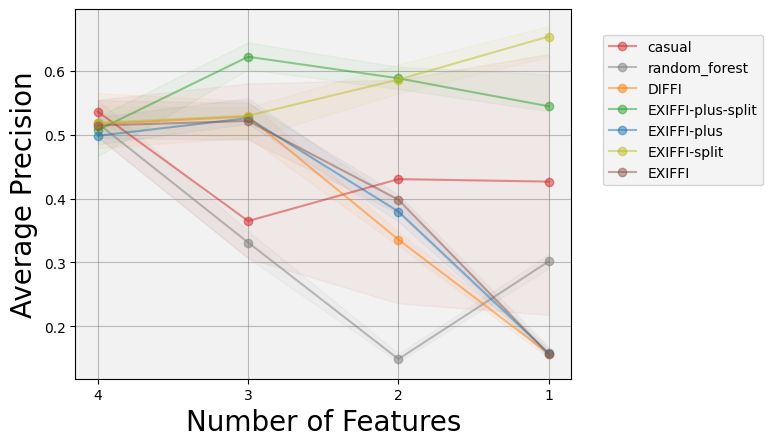

In [13]:
obtain_featsel('diabetes')